In [1]:
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
from pathlib import Path
import sys
dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data # noqa
from lib.utils import table_generation # noqa
from lib.utils import get_fold_acc_auc, classification_table # noqa

# Site-target dependant
## Age regression

In [6]:

exp_dir = "/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/"


methods = ["cheat", "none", "juharmonize","leak","notarget"]
results_method = pd.DataFrame()
results = pd.DataFrame()
for method in methods:
    results_method = pd.DataFrame()

    print(method)

    results_method["y_pred"] = pd.read_csv(exp_dir+ "y_pred_"+method+".csv", index_col=0).dropna(axis=1).to_numpy().ravel()

    
    results_method["y_true"] = pd.read_csv(exp_dir+ "y_true.csv", index_col=0).dropna(axis=1).to_numpy().ravel()
    results_method["site"] = pd.read_csv(exp_dir+ "sites.csv", index_col=0).dropna(axis=1).to_numpy().ravel()

    results_method["y_diff"] = (results_method["y_true"]-results_method["y_pred"])
    results_method["Harmonization Scheme"] = method
    results = pd.concat([results,results_method])




cheat
none
juharmonize
leak
notarget


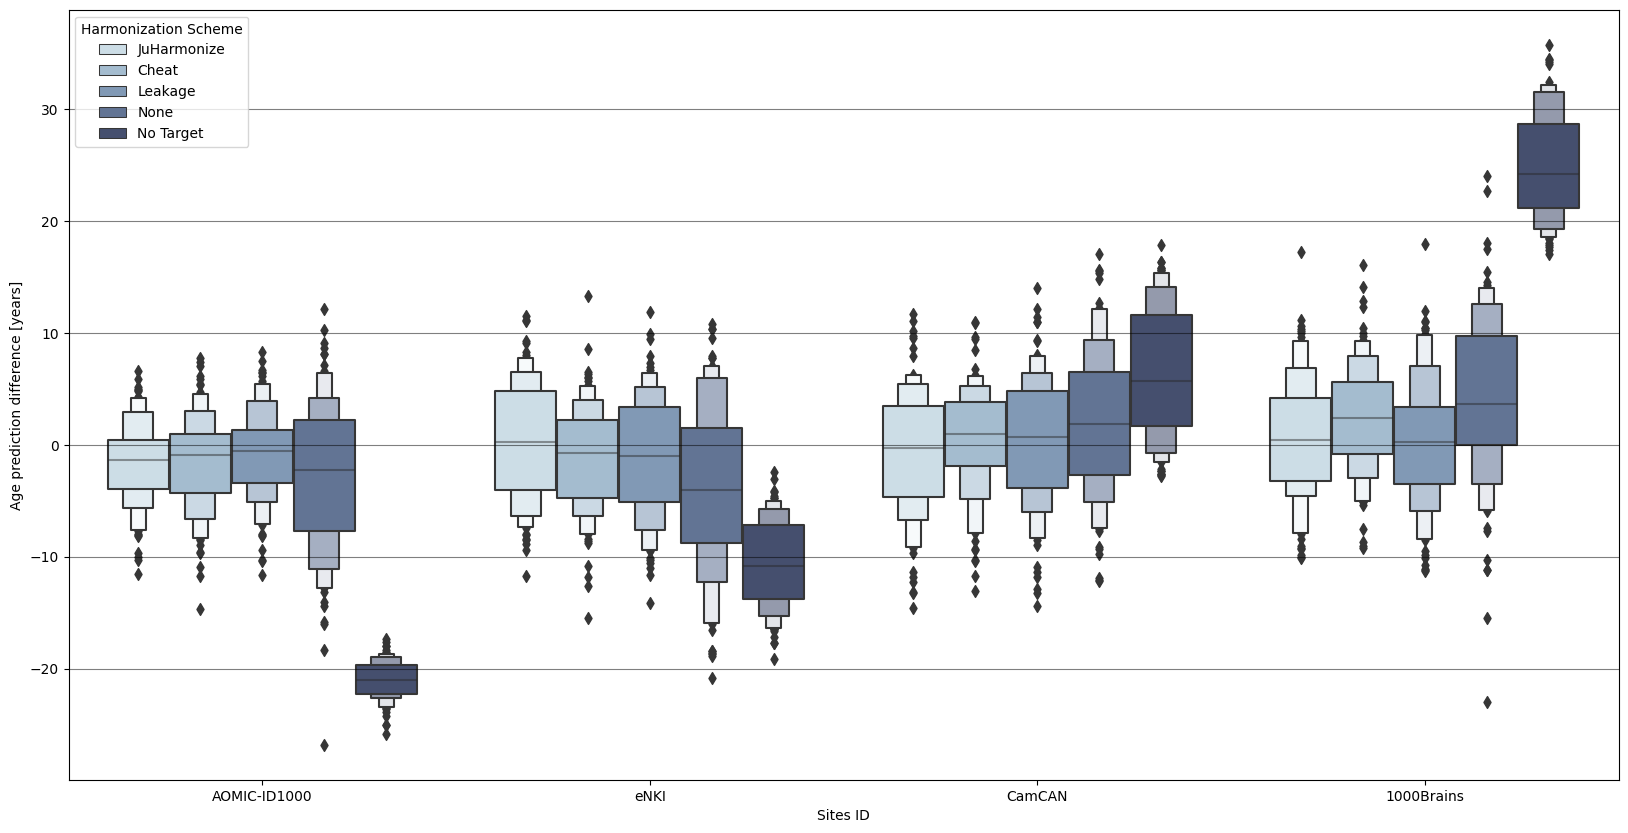

In [7]:
fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

results["Harmonization Scheme"].replace({"juharmonize": "JuHarmonize",
                                "leak": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "notarget": "No Target"}, inplace=True)

results["site"].replace({0: "AOMIC-ID1000",
                                1: "eNKI",
                                2: "CamCAN",
                                3: "1000Brains",}, inplace=True)
sbn.boxenplot(
    data=results, palette=pal,
    x="site", y="y_diff", hue="Harmonization Scheme",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

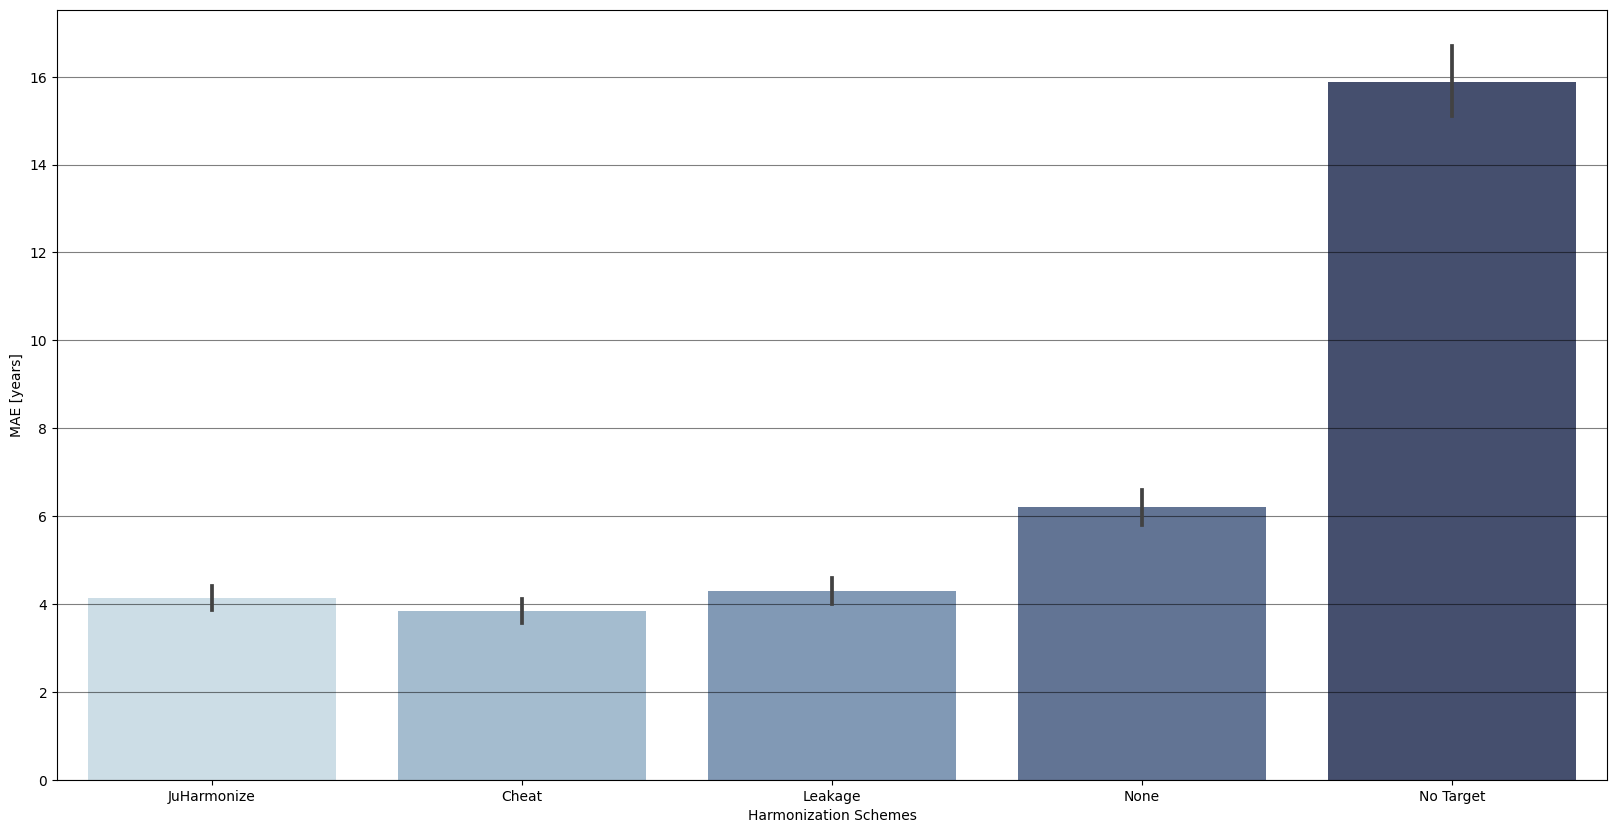

In [8]:
results["y_diff_abs"] = np.abs(results["y_diff"])
fig, ax = plt.subplots(1, 1, figsize=[20, 10])

ax = sbn.barplot(
    data=results, 
    x="Harmonization Scheme", y="y_diff_abs",
    order=harm_modes,
    palette=pal
)
plt.ylabel("MAE [years]")
plt.xlabel("Harmonization Schemes")
plt.grid(alpha=0.5, axis="y", c="black")

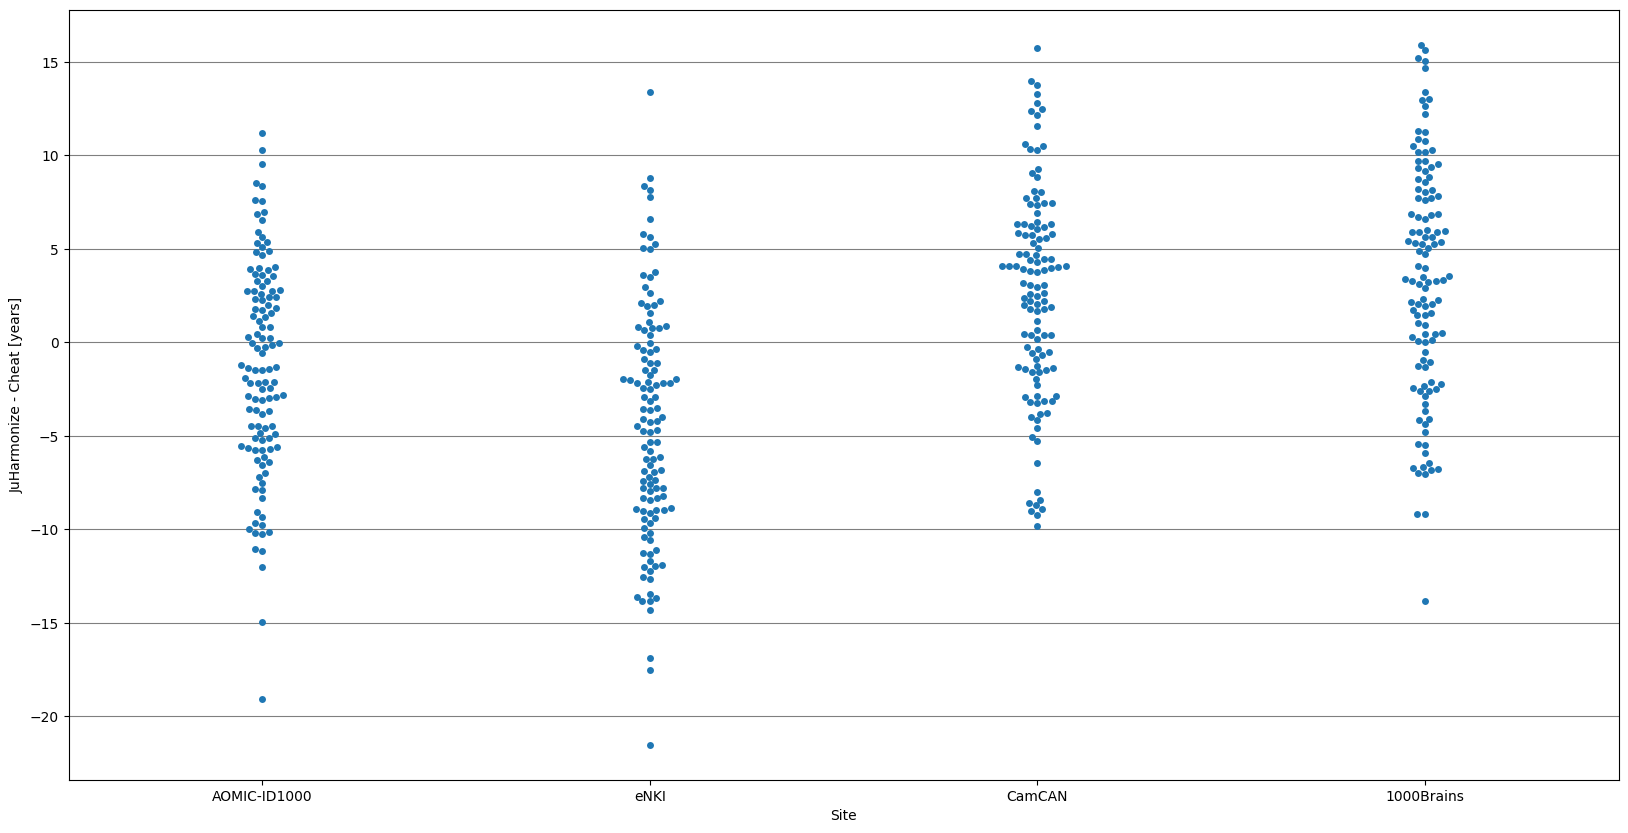

In [20]:
results["y_diff_abs"] = np.abs(results["y_diff"])
fig, ax = plt.subplots(1, 1, figsize=[20, 10])
JuHar = results[results["Harmonization Scheme"] == "JuHarmonize"]
cheat = results[results["Harmonization Scheme"] == "None"]
Y_difffff = JuHar["y_pred"] - cheat["y_pred"]

ax = sbn.swarmplot(
     y=Y_difffff.values, x=JuHar["site"]

)
plt.ylabel("JuHarmonize - Cheat [years]")
plt.xlabel("Site")
plt.grid(alpha=0.5, axis="y", c="black")

In [11]:
results

NameError: name 'Y_difffff' is not defined

In [9]:
results = pd.read_csv("/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/results/results_age_regression_balanced_disjoint_ranges.csv")

results.rename(columns={"Harmonization Scheme":"Harmonization Schemes"}, inplace=True)

# Get Harmonizations modes
harm_modes = np.unique(results["Harmonization Schemes"])
# Initialize a table as a dataframe
table = pd.DataFrame(columns=harm_modes, index=["MAE", "R2", "Age bias"])

# Iterate over each mode
for mode in harm_modes:
    resut_mode = results[results["Harmonization Schemes"] == mode]
    final_stat = resut_mode.mean(numeric_only=True)
    table[mode] = final_stat["MAE"],final_stat["R2"],final_stat["Age bias"]

print(table)

          Cheat Test  JuHarmonize Test  Leakage Test  No Target Test  \
MAE         3.827402          4.120185      4.287193       15.938492   
R2          0.925738          0.919463      0.912036       -0.007474   
Age bias   -0.321290         -0.264923     -0.238011       -0.998774   

          None Test  
MAE        6.200548  
R2         0.813226  
Age bias  -0.433264  


## Sex classification

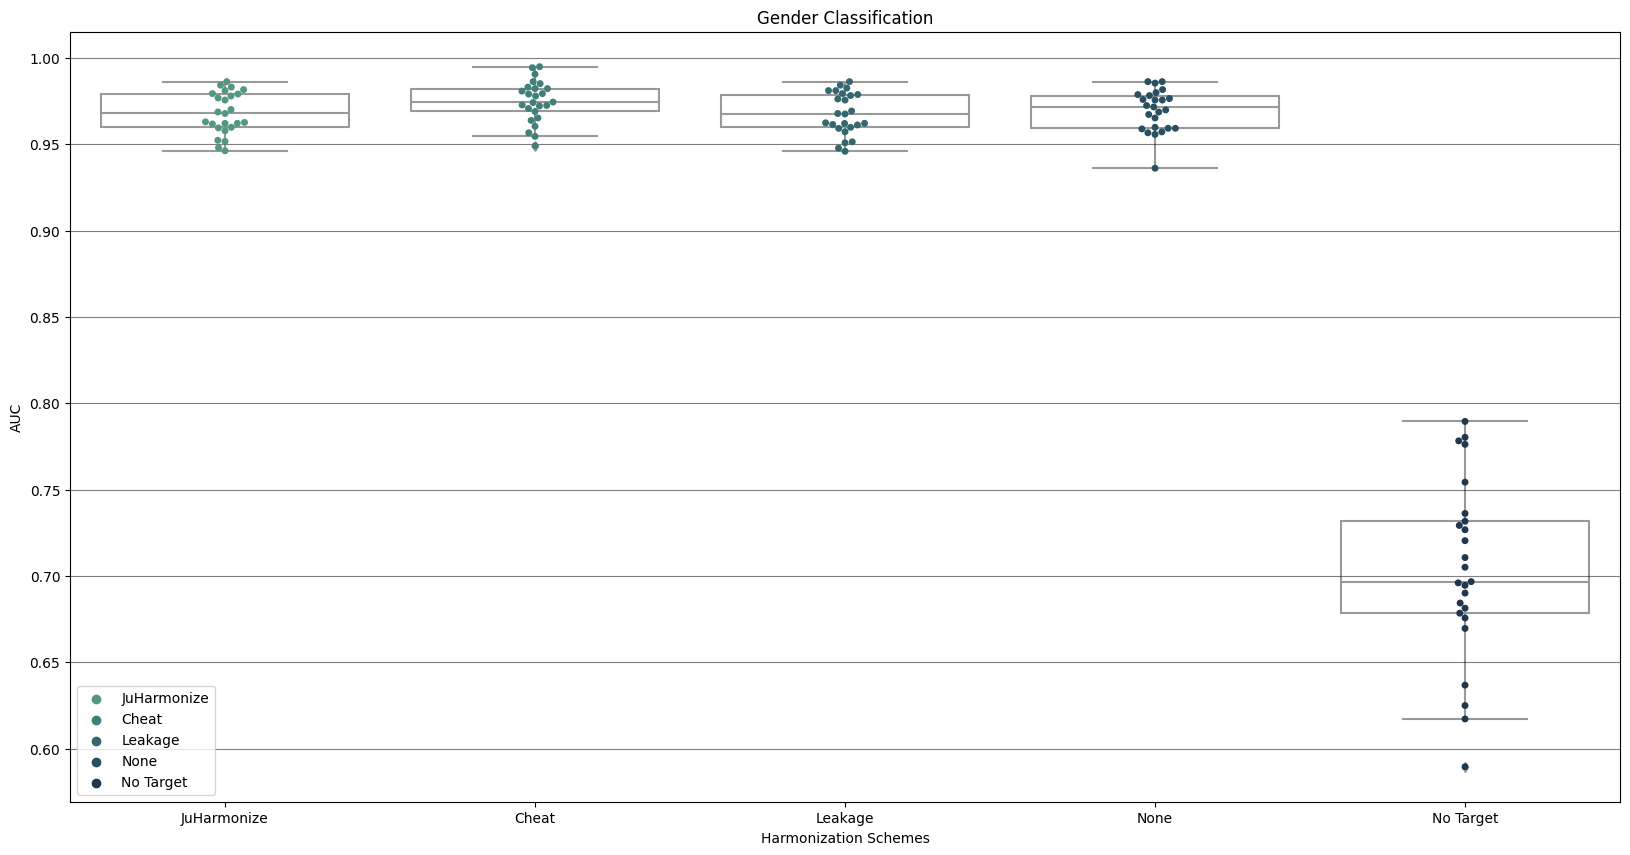

In [21]:
results = pd.read_csv("/home/nnieto/Nico/Harmonization/results_classification/test_imbalanced_genders_lg_pred_lg_stack/results_all_methods.csv")

results.rename(columns={"Model": "Harmonization Schemes"},
            inplace=True)
harm_methods = ["JuHarmonize Test", "Cheat Test", "Leakage Test", "No Target Test", "None Test"]

results = results[results["Harmonization Schemes"].isin(harm_methods)]

# Change to appropiated names
results["Harmonization Schemes"].replace({"JuHarmonize Test": "JuHarmonize",
                                       "Leakage Test": "Leakage",
                                       "None Test": "None",
                                       "Cheat Test": "Cheat",
                                       "No Target Test": "No Target"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Cheat", "Leakage" , "None", "No Target"]
metric_to_plot = "AUC"

# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[12, 7])
sbn.swarmplot(
    data=results,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    hue_order=harm_modes,
    order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=results, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Harmonization Schemes")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

In [11]:
table = pd.DataFrame(columns=harm_modes, index=["AUC", "Balanced ACC", "F1"])

# Iterate over each mode
for mode in harm_modes:
    resut_mode = results[results["Harmonization Schemes"] == mode]
    final_stat = resut_mode.mean(numeric_only=True)
    table[mode] = final_stat["AUC"],final_stat["Balanced ACC"],final_stat["F1"]

print(table)

              JuHarmonize     Cheat   Leakage      None  No Target
AUC              0.967863  0.974772  0.967495  0.969441   0.702960
Balanced ACC     0.921823  0.920979  0.920724  0.926430   0.630785
F1               0.918013  0.916863  0.916766  0.922617   0.607571


# eICU dataset

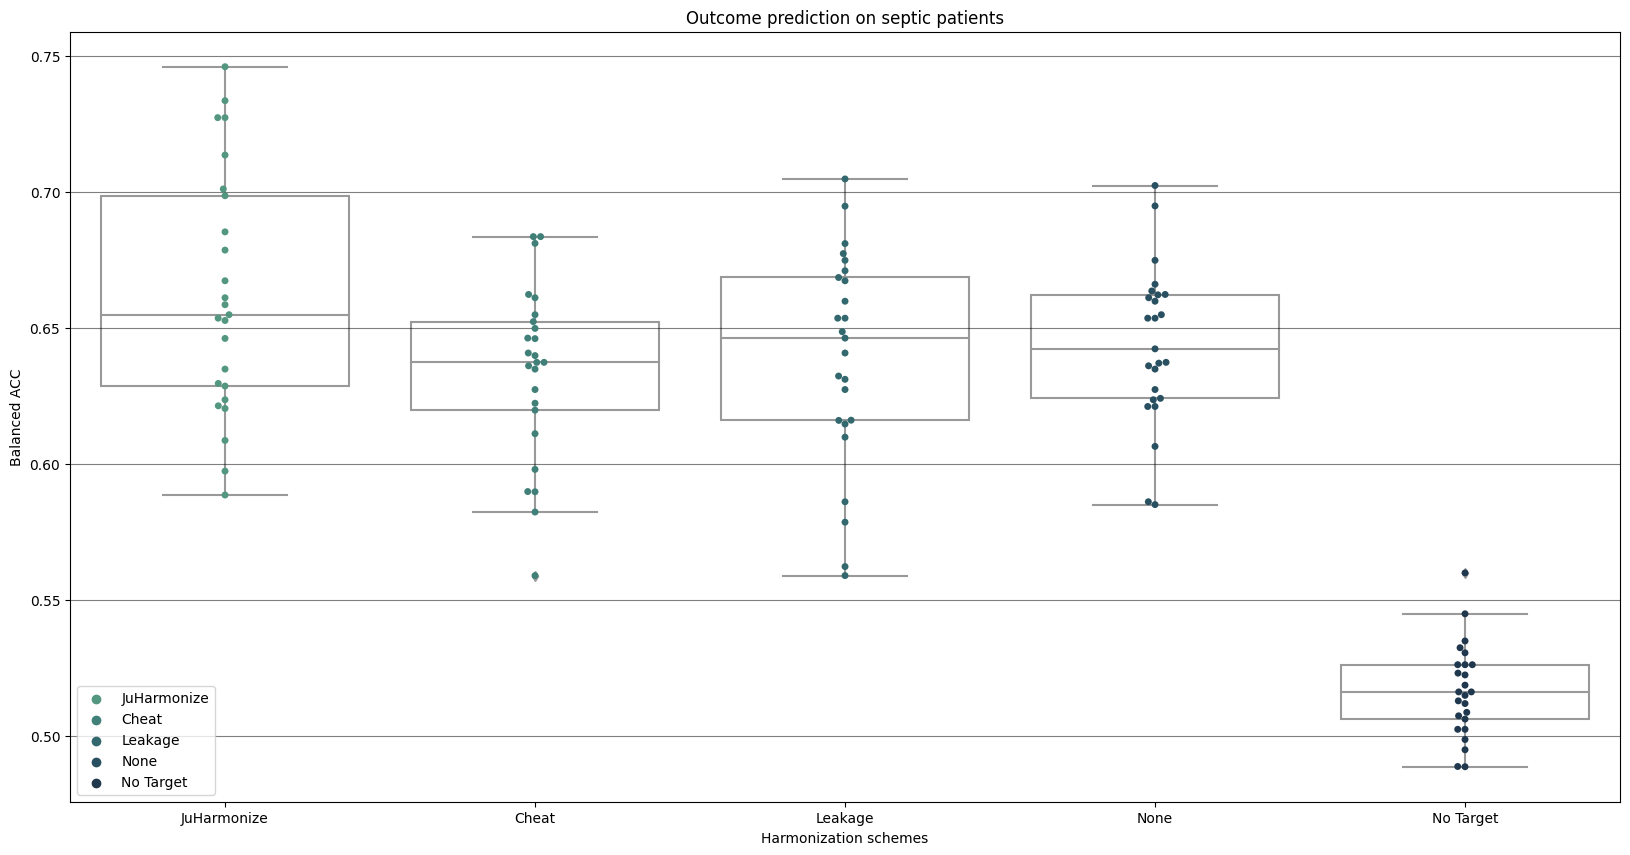

In [34]:
data_dir = "/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/results/sepsis_classification_eicu/"
data = pd.read_csv(data_dir+"eiCU_results_dependance.csv")
models_to_plot = ["JuHarmonize Test", "Cheat Test", "Leakage Test", "None Test","No Target Test"]

# Select methods to plot
data = data[data["Model"].isin(models_to_plot)]
data["Model"].replace({"JuHarmonize Test": "JuHarmonize",
                                "Cheat Test": "Cheat",
                                "Leakage Test": "Leakage",
                                "No Target Test": "No Target",
                                "None Test": "None"}, inplace=True)
models_to_plot = ["JuHarmonize", "Cheat", "Leakage", "None","No Target"]

data.rename(columns={"Model":"Harmonization Schemes"}, inplace=True)
harm_modes = models_to_plot
metric_to_plot = "Balanced ACC"
import matplotlib.pyplot as plt
# Plot
# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)

plt.ylabel(metric_to_plot)
plt.xlabel("Harmonization schemes")
plt.title("Outcome prediction on septic patients")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

In [35]:
table = pd.DataFrame(columns=harm_modes, index=["AUC", "Balanced ACC", "F1"])
results = data
# Iterate over each mode
for mode in harm_modes:
    resut_mode = results[results["Harmonization Schemes"] == mode]
    final_stat = resut_mode.mean(numeric_only=True)
    table[mode] = final_stat["AUC"],final_stat["Balanced ACC"],final_stat["F1"]

print(table)

              JuHarmonize     Cheat   Leakage      None  No Target
AUC              0.858775  0.799528  0.789721  0.765467   0.572344
Balanced ACC     0.662452  0.633959  0.639118  0.643764   0.516681
F1               0.490954  0.440777  0.451717  0.457140   0.092056


In [ ]:

import pandas as pd
import seaborn as sbn
data_dir = "/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/results/Kersten/"
data = pd.read_csv(data_dir+"Kersten_results_independance.csv")
models_to_plot = ["JuHarmonize Test", "Cheat Test", "Leakage Test", "None Test","No Target Test"]

# Select methods to plot
data = data[data["Model"].isin(models_to_plot)]
data["Model"].replace({"JuHarmonize Test": "JuHarmonize",
                                "Cheat Test": "Cheat",
                                "Leakage Test": "Leakage",
                                "No Target Test": "No Target",
                                "None Test": "None"}, inplace=True)
models_to_plot = ["JuHarmonize", "Cheat", "Leakage", "None","No Target"]

data.rename(columns={"Model":"Harmonization Schemes"}, inplace=True)
harm_modes = models_to_plot
metric_to_plot = "Balanced ACC"
import matplotlib.pyplot as plt
# Plot
# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.ylim([0.45,0.78])

plt.xlabel("Harmonization schemes")
plt.title("Dementia-MCI classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

# Site-target independant

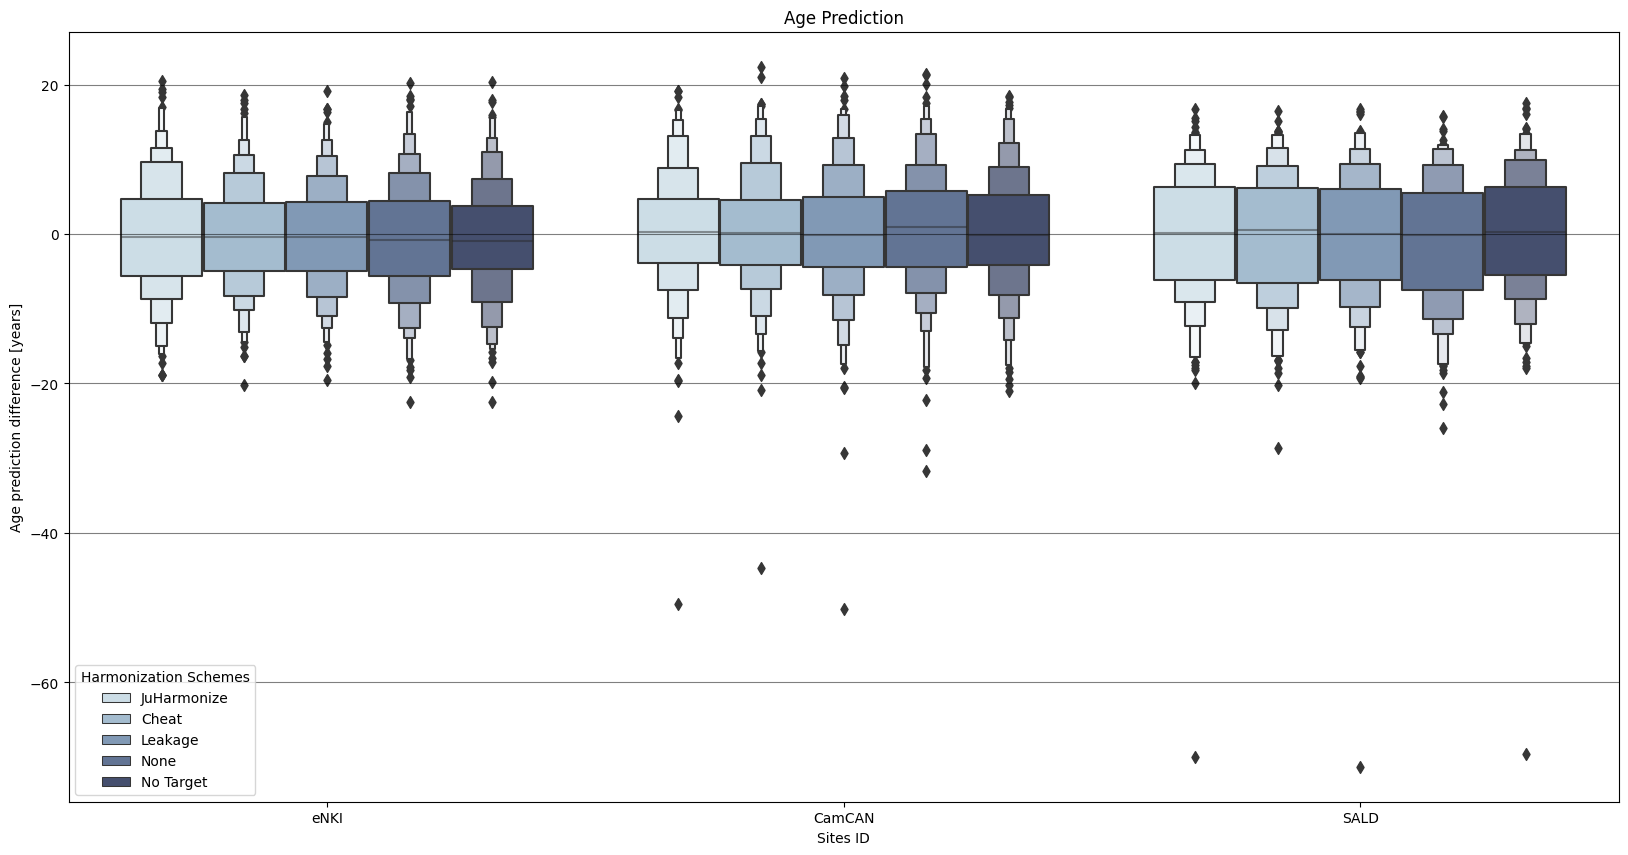

In [23]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_balanced_data_rvr_stack_rvr_pred'}
data = extract_experiment_data(exp_dir, experiments_to_check, train=False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False
harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    hue_order=harm_modes,
    x="site", y="y_diff", hue="Harmonization Schemes"

)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()



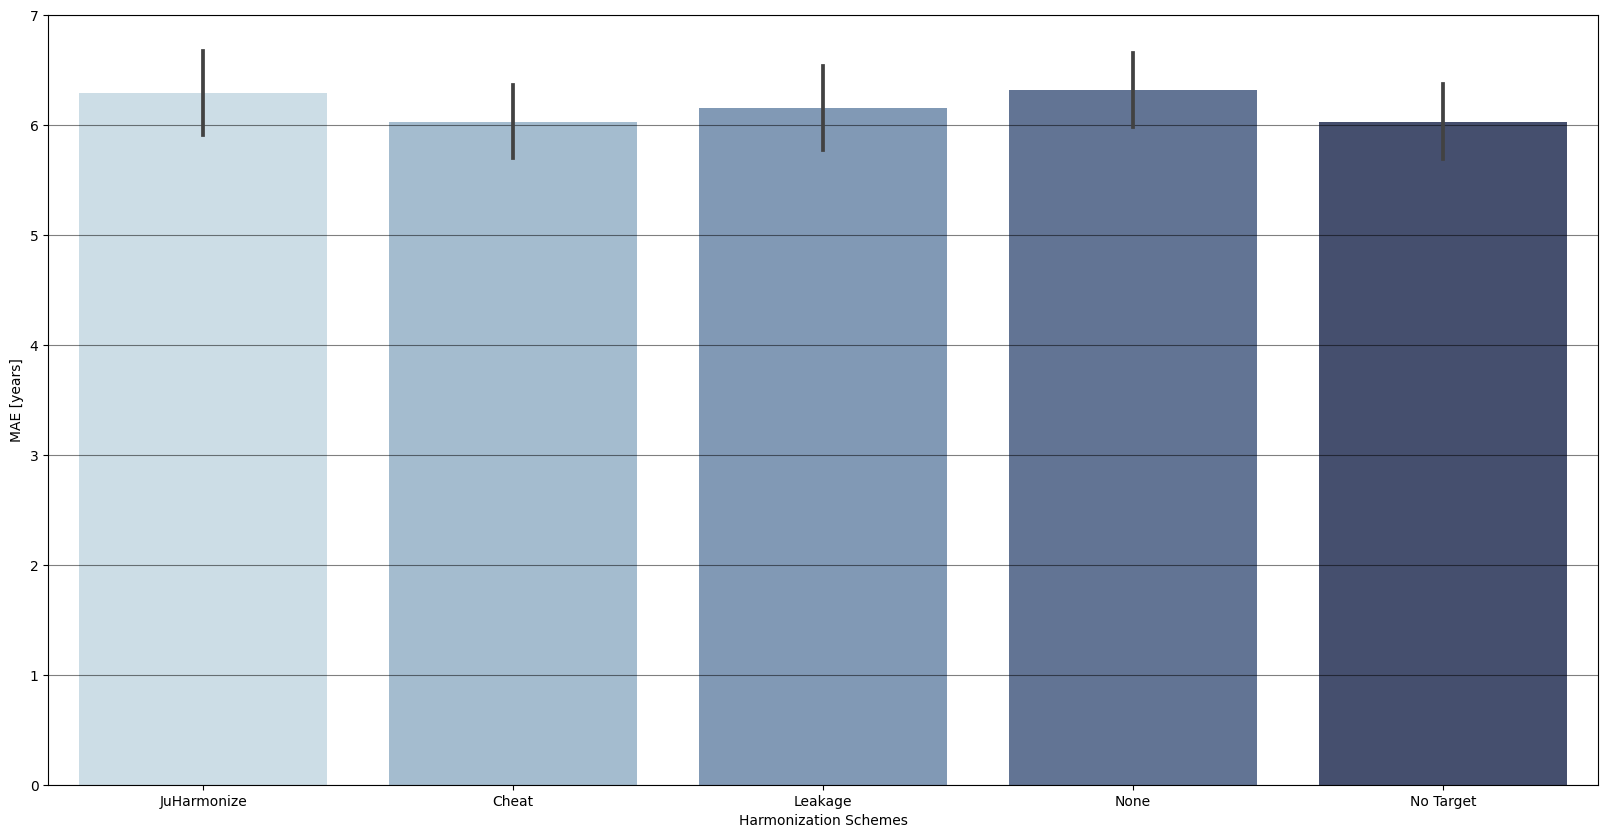

In [24]:
data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
data = data[data["Harmonization Schemes"].isin(harm_modes)]

fig = plt.figure(figsize=[20, 10])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data,
    x="Harmonization Schemes", y="y_diff",
    order=harm_modes, ax=ax,
    palette=pal, seed=23, n_boot=1000
)
plt.ylabel("MAE [years]")
plt.xlabel("Harmonization Schemes")

plt.grid(alpha=0.5, axis="y", c="black")

plt.show()

In [14]:
table = table_generation(data)
print(table)

             Age_bias        R2       MAE
Cheat       -0.366155  0.803460  6.034794
JuHarmonize -0.423953  0.769231  6.306701
Leakage     -0.319046  0.775501  6.153351
No Target   -0.341006  0.790369  6.036082
None        -0.361386  0.785301  6.314433


## Sex classification


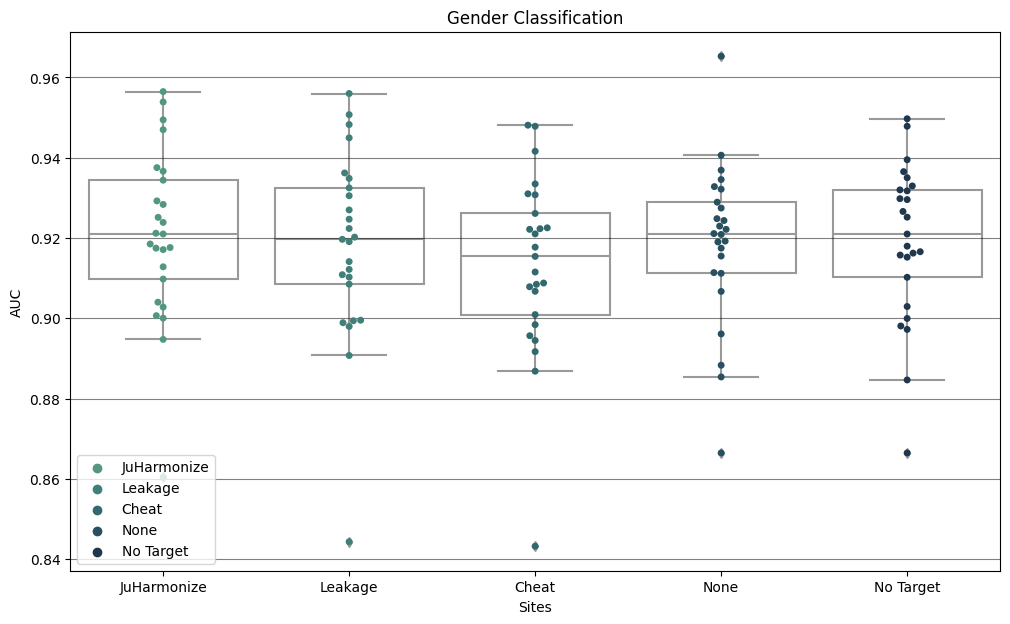

In [15]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_classification/"
experiments_to_check = {
    'test_classification_balanced_data_logit_stack_gssvm_pred_5repetitions'
}
# Get results
data = extract_experiment_data(exp_dir, experiments_to_check, False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data = get_fold_acc_auc(data)
# Change to appropiated names
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "predict": "NeuroHarmony",
                                       "notarget": "No Target"},
                                      inplace=True)

# Select methods to plot
harm_modes = ["JuHarmonize", "Leakage", "Cheat", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
data = data[data["site"].isin(["Global"])]

# site_order = ["Global", "eNKI", "CamCAN"]
metric_to_plot = "AUC"

# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[12, 7])
sbn.swarmplot(
    data=data,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)
plt.xlabel("Sites")
plt.title("Gender Classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

In [16]:
table = pd.DataFrame(columns=harm_modes, index=["AUC", "Balanced ACC", "F1"])
results = data
# Iterate over each mode
for mode in harm_modes:
    resut_mode = results[results["Harmonization Schemes"] == mode]
    final_stat = resut_mode.mean(numeric_only=True)
    table[mode] = final_stat["AUC"],final_stat["Balanced Accuracy"],final_stat["F1"]

print(table)


              JuHarmonize   Leakage     Cheat      None  No Target
AUC              0.920806  0.918152  0.913386  0.918872   0.919150
Balanced ACC     0.850609  0.851619  0.846380  0.849389   0.848534
F1               0.851088  0.852031  0.847230  0.851855   0.849066


# eICU

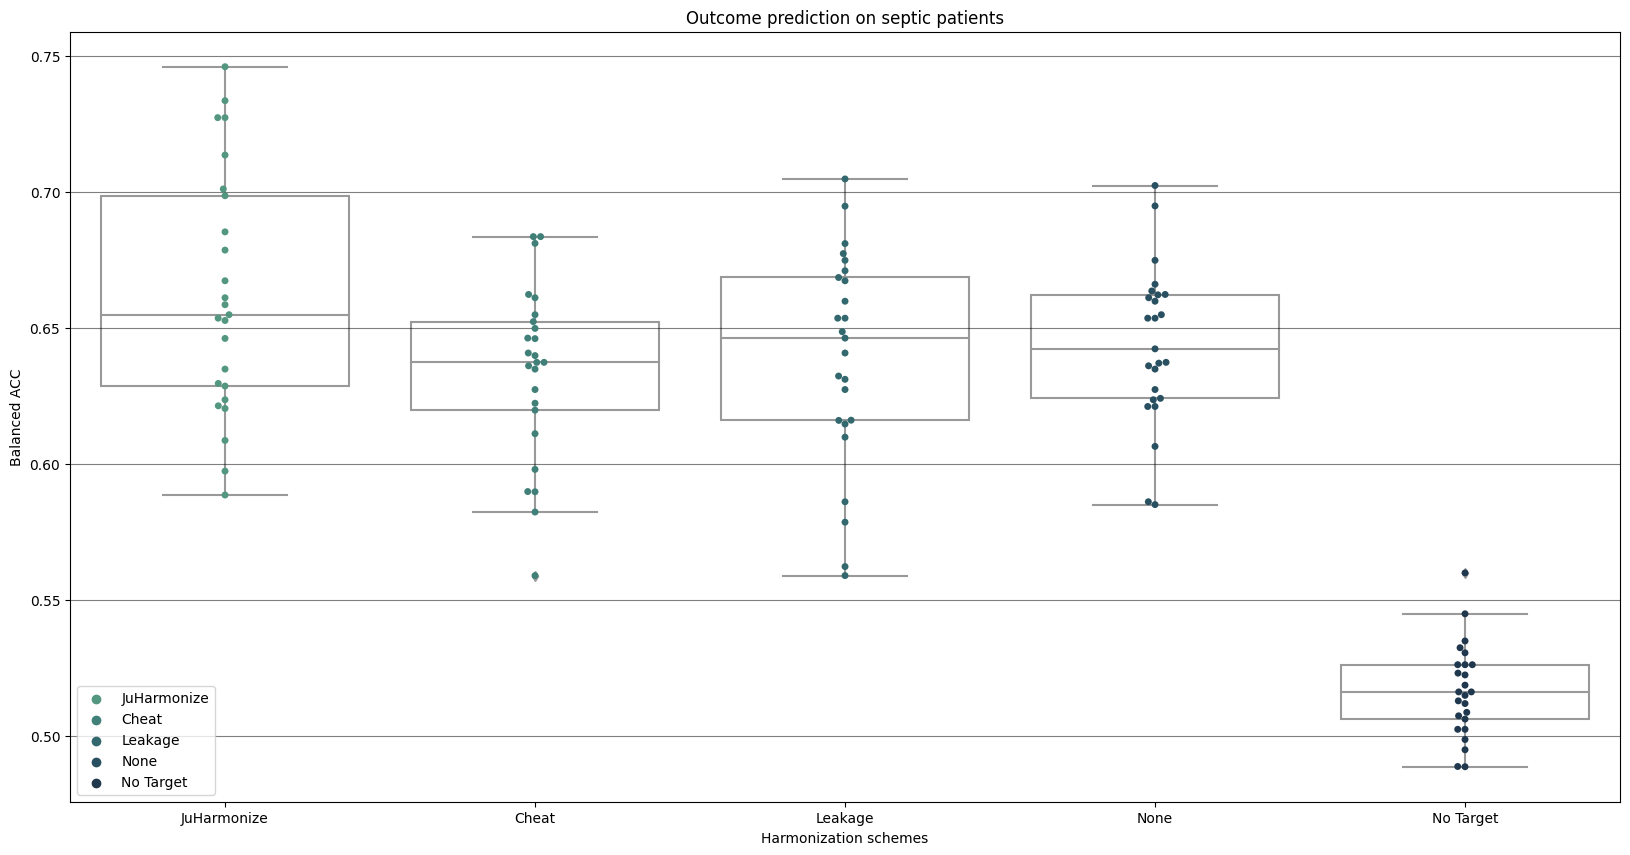

In [28]:
data_dir = "/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/results/sepsis_classification_eicu/"
data = pd.read_csv(data_dir+"eiCU_results_independance.csv")
models_to_plot = ["JuHarmonize Test", "Cheat Test", "Leakage Test", "None Test","No Target Test"]

# Select methods to plot
data = data[data["Model"].isin(models_to_plot)]
data["Model"].replace({"JuHarmonize Test": "JuHarmonize",
                                "Cheat Test": "Cheat",
                                "Leakage Test": "Leakage",
                                "No Target Test": "No Target",
                                "None Test": "None"}, inplace=True)
models_to_plot = ["JuHarmonize", "Cheat", "Leakage", "None","No Target"]

data.rename(columns={"Model":"Harmonization Schemes"}, inplace=True)
harm_modes = models_to_plot
metric_to_plot = "Balanced ACC"
import matplotlib.pyplot as plt
# Plot
# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)

plt.ylabel(metric_to_plot)
plt.xlabel("Harmonization schemes")
plt.title("Outcome prediction on septic patients")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

In [ ]:

import pandas as pd
import seaborn as sbn
data_dir = "/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/results/Kersten/"
data = pd.read_csv(data_dir+"Kersten_results_independance.csv")
models_to_plot = ["JuHarmonize Test", "Cheat Test", "Leakage Test", "None Test","No Target Test"]

# Select methods to plot
data = data[data["Model"].isin(models_to_plot)]
data["Model"].replace({"JuHarmonize Test": "JuHarmonize",
                                "Cheat Test": "Cheat",
                                "Leakage Test": "Leakage",
                                "No Target Test": "No Target",
                                "None Test": "None"}, inplace=True)
models_to_plot = ["JuHarmonize", "Cheat", "Leakage", "None","No Target"]

data.rename(columns={"Model":"Harmonization Schemes"}, inplace=True)
harm_modes = models_to_plot
metric_to_plot = "Balanced ACC"
import matplotlib.pyplot as plt
# Plot
# Plot
pal = sbn.cubehelix_palette(5, rot=-.5, light=0.5, dark=0.2)
_, ax = plt.subplots(1, 1, figsize=[20, 10])
sbn.swarmplot(
    data=data,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    palette=pal,
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="Harmonization Schemes", y=metric_to_plot, hue="Harmonization Schemes",
    order=harm_modes,
    hue_order=harm_modes, dodge=False, ax=ax, palette=["w"]*len(harm_modes)
)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)],
          loc='lower left')
plt.ylabel(metric_to_plot)

plt.xlabel("Harmonization schemes")
plt.title("Dementia-MCI classification")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

# Supplementary
## Age regression

In [ ]:
data = results.copy()
harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data["Harmonization Scheme"].replace({"juharmonize": "JuHarmonize",
                                "leak": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "notarget": "No Target"}, inplace=True)


data["site"].replace({  0: "AOMIC-ID1000",
                        1: "eNKI",
                        2: "CamCAN",
                        3: "1000Brains"}, inplace=True)



hue_order = ['AOMIC-ID1000', 'eNKI', 'CamCAN', '1000Brains',]
for harm_to_plot in harm_modes:
    data_to_plot = data[data["Harmonization Scheme"] == harm_to_plot]
    fig, ax = plt.subplots(1, 1, figsize=[20, 10])
    pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
    sbn.scatterplot(
        data=data_to_plot,
        x="y_true", y="y_pred", hue="site", hue_order=hue_order
    )
    plt.ylabel("Predicted Age")
    MAE = mean_absolute_error(data_to_plot["y_true"],data_to_plot["y_pred"])
    plt.title(harm_to_plot + " - Age Prediction - MAE: " + str(MAE))
    plt.xlabel("True Age")
    age_range_y = [0,95]
    grid_distance = 10
    plt.yticks(np.arange(age_range_y[0], age_range_y[1], grid_distance))
    plt.grid(alpha=0.5, which="both", axis="y", c="black", linestyle="--")
    plt.legend([],framealpha=0)
    age_range = [18,80]
    plt.xlim(age_range)

    plt.ylim(age_range_y)
    sbn.lineplot(x=age_range, y=age_range)
    plt.show()



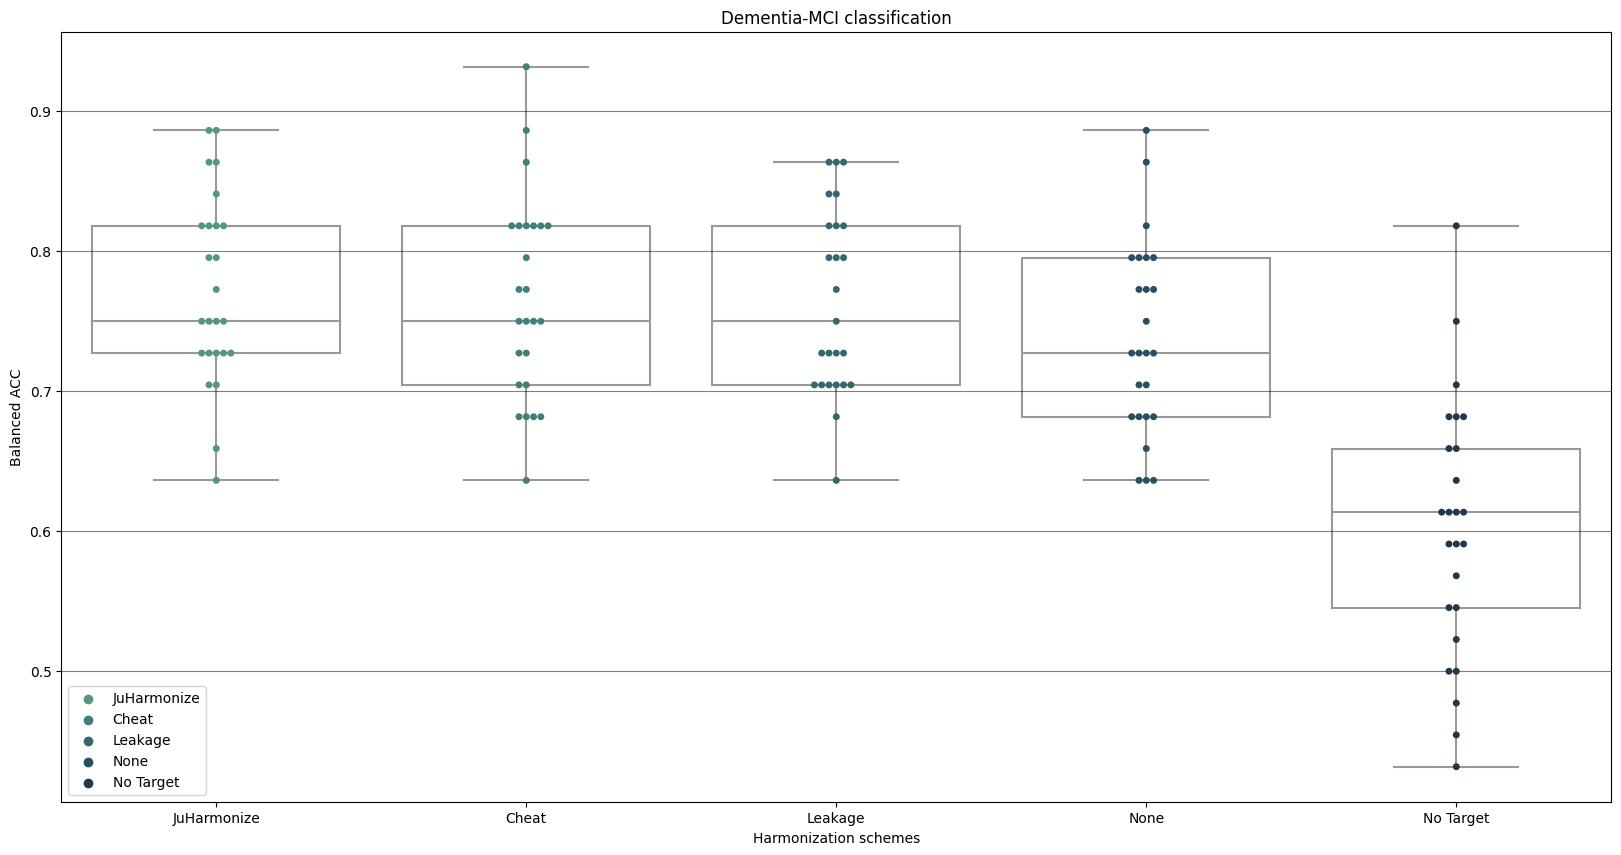

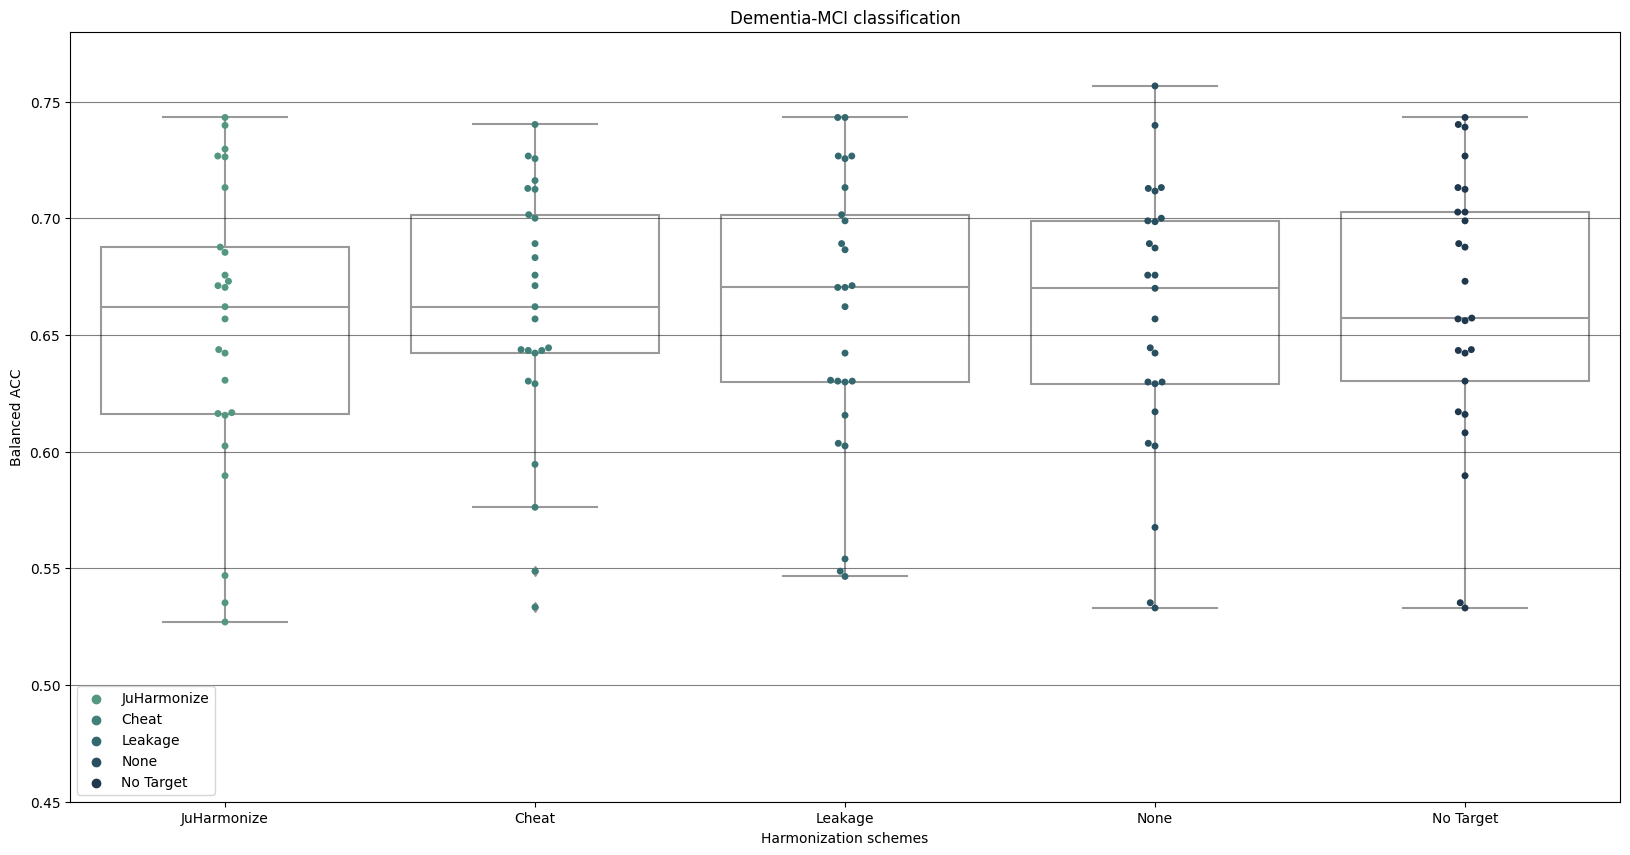